In [1]:
import pandas as pd
import geopy
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np


In [2]:
#reading file into a dataframe
file = "clean_data.csv"
df = pd.read_csv(file)
df.columns

Index(['API', 'Longitude', 'Latitude', 'Well Type', 'Operator',
       'Operator (Original)', 'Sub-play', 'County', 'First Production Date',
       'Vertical Depth (m)', 'Measured Depth (m)', 'Lateral Length (m)',
       'Drilling Days (days)', 'Drilling Speed (m/day)', 'Proppant (kg)',
       'API Gravity (degree)', 'Well Cost Total (US$)', 'Rig Cost (US$)',
       'Casing Cost (US$)', 'Water Cost (US$)', 'Proppant Cost (US$)',
       'Pumping Cost (US$)', 'Other Cost (US$)', 'Cum180 Oil (bbl)',
       'Cum365 Oil (bbl)', 'Cum180 Gas (mcf)', 'Cum365 Gas (mcf)',
       'IP Oil (b/d)', 'IP Gas (mmcfd)', 'IP Total (boe/d)', 'EUR Oil (mmbbl)',
       'EUR Gas (bcf)', 'EUR Total (mmboe)'],
      dtype='object')

In [5]:
labels = df['API']
latitudes = df['Latitude']
longitudes = df['Longitude']
production = (df['Cum180 Oil (bbl)'] / float(df['Cum180 Oil (bbl)'].max()))*50

In [7]:
# select map area
upper_right_lon = np.min(longitudes) - 0.05
lower_left_lon = np.max(longitudes) + 0.05
lower_left_lat = np.min(latitudes) - 0.05
upper_right_lat = np.max(latitudes) + 0.05

C:\ProgramData\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
C:\ProgramData\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


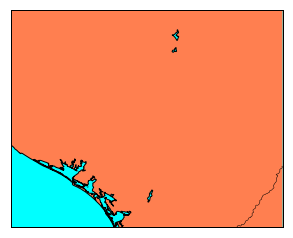

In [9]:
map = Basemap(projection='merc', lat_0 = 57, lon_0 = -135,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=lower_left_lon, llcrnrlat=lower_left_lat,
    urcrnrlon=upper_right_lon, urcrnrlat=upper_right_lat)

map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'coral',lake_color='aqua')
map.drawmapboundary(fill_color='aqua')

In [3]:
#Overview of Eagle Ford Play
summary = df.groupby(['Sub-play'])['Operator', "API"].nunique()
summary = summary.rename(columns = {"API": "Well count", "Operator": "Operator Count"})
summary

,Operator Count,Well count
Sub-play,,
Black Oil,76,4168
Edwards Condensate,24,2939
Hawkville Condensate,29,2691
Karnes Trough,30,3644
Maverick Condensate,21,3115
Maverick Oil,17,146
Northeast Oil,21,404
Other Eagle Ford,11,33
Southeast Gas,5,45


In [131]:
#Overview of Eagle Ford Play
summary = df.groupby(['Sub-play'])['Operator', "API"].nunique()
summary = summary.rename(columns = {"API": "Well count", "Operator": "Operator Count"})


#Calculating summary statistics for each sub-play

agg = {
    'Well Cost Total (US$)': {'Avg Well cost': 'mean'}, 
    'Rig Cost (US$)': {'Avg Rig Cost (US$)':'mean'}, 
    'EUR Total (mmboe)':{'Avg EUR (mmboe)': 'mean'},
    'Cum365 Gas (mcf)': {'Avg Cum365 Gas (mcf)': 'mean', 'Max Cum365 Gas (mcf)': max},
    'Cum365 Oil (bbl)': {'Avg Cum365 Oil (bbl)': 'mean', 'Max Cum365 Oil (bbl)': max}

}


summary = df.groupby(['Sub-play'])['Operator', "API"].nunique().agg(agg)


# profit_items.columns = profit_items.columns.droplevel()
# profit_items = profit_items.sort_values(ascending=False, by = 'Total Purchase Value')[:5]
# profit_items[['Item price','Total Purchase Value']] = profit_items[['Item price','Total Purchase Value']].applymap('${:,.2f}'.format)
# profit_items
# d = {'Number of unique items': [items], 'Total number of purchases': [purchases], 'Average price': [avr_price], 'Total revenue': [revenue]}
# summary_df = pd.DataFrame(data=d)

# #Adding dollar signs to dollar values 
# summary_df[['Average price', 'Total revenue']] = summary_df[['Average price', 'Total revenue']].applymap('${:,.2f}'.format)
# summary_df

summary
# EAGLEFORD OVERVIEW:
# Visualize:
# 1.	How many sub-plays
# 2.	How many operators 
# 3.	How many wells/operators 

# Descriptive statistics:
# 1.	Avg IP, EUR
# 2.	Avg Development costs 
# 3.	Avg Lateral length
# 4.	Avg proppant 



SpecificationError: cannot perform renaming for Well Cost Total (US$) with a nested dictionary

In [132]:
#Overview of Eagle Ford Play



#Calculating summary statistics for each sub-play

agg = {
    'Well Cost Total (US$)': {'Avg Well cost': 'mean'}, 
    'Rig Cost (US$)': {'Avg Rig Cost (US$)':'mean'}, 
    'EUR Total (mmboe)':{'Avg EUR (mmboe)': 'mean'},
    'Cum365 Gas (mcf)': {'Avg Cum365 Gas (mcf)': 'mean', 'Max Cum365 Gas (mcf)': max},
    'Cum365 Oil (bbl)': {'Avg Cum365 Oil (bbl)': 'mean', 'Max Cum365 Oil (bbl)': max}

}


summary_1 = df.groupby(['Sub-play']).agg(agg)
summary_1.columns = summary_1.columns.droplevel()
summary_1

/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/core/groupby/groupby.py:4658: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,Avg Well cost,Avg Rig Cost (US$),Avg EUR (mmboe),Avg Cum365 Gas (mcf),Max Cum365 Gas (mcf),Avg Cum365 Oil (bbl),Max Cum365 Oil (bbl)
Sub-play,,,,,,,
Black Oil,6.616557e+06,571394.653952,0.303541,71940.216188,631180.0,71968.992428,457540.0
Edwards Condensate,7.352757e+06,787762.745528,0.528737,491961.127064,5670010.0,102136.813352,954071.0
Hawkville Condensate,7.286108e+06,684179.590484,0.378131,234708.285273,3355674.0,62014.647468,481699.0
Karnes Trough,7.205512e+06,649498.131925,0.437968,164809.770368,2157301.0,113501.175123,915021.0
Maverick Condensate,6.653161e+06,679298.460690,0.616124,538671.729564,3743322.0,47548.895095,522446.0
Maverick Oil,6.445103e+06,517461.491525,0.182250,45906.956835,313667.0,30959.719424,147557.0
Northeast Oil,7.574177e+06,734220.834437,0.220791,61836.686649,924010.0,44678.446866,181615.0
Other Eagle Ford,7.049543e+06,669418.870944,0.160435,28213.848485,193871.0,39411.545455,94201.0
Southeast Gas,7.884221e+06,972062.909091,0.623721,985148.333333,2457807.0,5387.577778,26339.0


In [135]:
summary_final = pd.merge(summary, summary_1, on= "Sub-play")
summary_final


,Operator Count,Well count,Avg Well cost,Avg Rig Cost (US$),Avg EUR (mmboe),Avg Cum365 Gas (mcf),Max Cum365 Gas (mcf),Avg Cum365 Oil (bbl),Max Cum365 Oil (bbl)
Sub-play,,,,,,,,,
Black Oil,76,4168,6.616557e+06,571394.653952,0.303541,71940.216188,631180.0,71968.992428,457540.0
Edwards Condensate,24,2939,7.352757e+06,787762.745528,0.528737,491961.127064,5670010.0,102136.813352,954071.0
Hawkville Condensate,29,2691,7.286108e+06,684179.590484,0.378131,234708.285273,3355674.0,62014.647468,481699.0
Karnes Trough,30,3644,7.205512e+06,649498.131925,0.437968,164809.770368,2157301.0,113501.175123,915021.0
Maverick Condensate,21,3115,6.653161e+06,679298.460690,0.616124,538671.729564,3743322.0,47548.895095,522446.0
Maverick Oil,17,146,6.445103e+06,517461.491525,0.182250,45906.956835,313667.0,30959.719424,147557.0
Northeast Oil,21,404,7.574177e+06,734220.834437,0.220791,61836.686649,924010.0,44678.446866,181615.0
Other Eagle Ford,11,33,7.049543e+06,669418.870944,0.160435,28213.848485,193871.0,39411.545455,94201.0
Southeast Gas,5,45,7.884221e+06,972062.909091,0.623721,985148.333333,2457807.0,5387.577778,26339.0


In [27]:
subplay_df = df.groupby(["Sub-play"])['Operator'].count()
subplay_df


Sub-play
Black Oil               4164
Edwards Condensate      2939
Hawkville Condensate    2687
Karnes Trough           3643
Maverick Condensate     3115
Maverick Oil             146
Northeast Oil            404
Other Eagle Ford          33
Southeast Gas             45
Southwest Gas            696
Name: Operator, dtype: int64